### Classifying and predicting early hospital readmissions:

Classifying with supervised learning whether diabetic patients are readmitted, and if they are, if it's before or after 30 days.

Using the dataset from here: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

In [2]:
import pandas as pd
import patsy as patsy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

# SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Undersampling
from imblearn.under_sampling import RandomUnderSampler

from sklearn import metrics
from sklearn.metrics import precision_recall_curve

from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, RandomizedSearchCV, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler

import pickle

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
with open("x_liv.pkl", 'rb') as picklefile:
    X = pickle.load(picklefile)

with open("y_liv.pkl", 'rb') as picklefile:
    y = pickle.load(picklefile)

In [4]:
y = y.replace({'<30': 1, '>30': 0, 'NO': 0})

In [5]:
# y.head()
# set(list(y))
# y.describe()

In [6]:
# stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
# standard scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# # smote oversampling (now moved to pipeline)
# X_train, y_train = smote.fit_sample(X_train, y_train)

In [9]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier())) # can take a very long time
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# models.append(('SVM', SVC())) # can take a very long time
# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'

In [10]:
kfold = StratifiedKFold(n_splits=5, random_state=42)
smote = SMOTE()

for name, model in models:
    pipeline = Pipeline([('smote', smote),
                     (name,model)])
    cv_results = cross_val_score(
        pipeline, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

LR: 0.645524 (0.004789)


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA: 0.643336 (0.004771)
DT: 0.523689 (0.001663)
NB: 0.505719 (0.000543)


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/skl

ETC: 0.584038 (0.006372)


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/skl

RF: 0.586587 (0.003259)
ADA: 0.616961 (0.010023)
GBM: 0.651680 (0.007870)


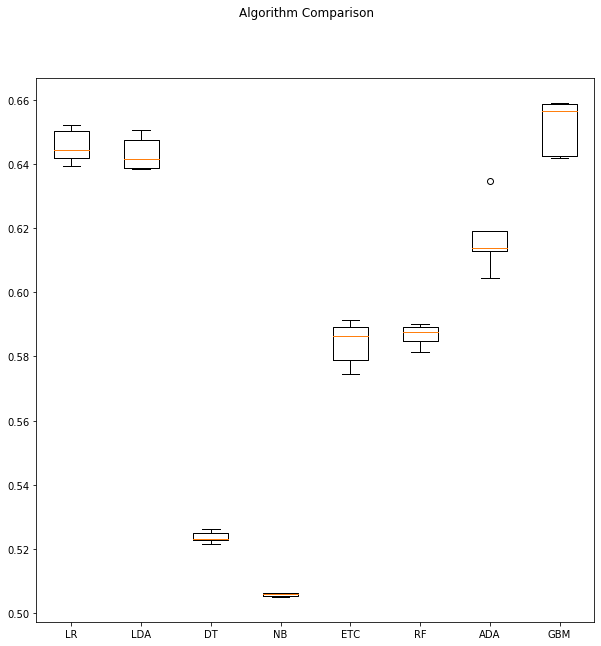

In [11]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(10,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# store model score rather than just printing
# best_model_name = %% sort through the tuples or dictionary to find the best model
# print the name of the best model

In [12]:
# Best model was extra trees:

best_model_name = 'GBM' # manual assignment will be replaced with above code block

if best_model_name == 'RF':
    param_grid = {'n_estimators': range(50, 201, 25),
                  'max_features': range(50, X.shape[1], 50),
                  'min_samples_leaf': range(20, 50, 5),
                  'min_samples_split': range(15, 36, 5)}

    model = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, min_samples_split=25,
                                 min_samples_leaf=35, max_features=150)

In [ ]:
kfold = StratifiedKFold(n_splits=5, random_state=42)

In [13]:
pipeline = Pipeline([('smote', smote),
         (name, model)])

def grid_or_random_cv(grid_or_random='random'):
    if grid_or_random == 'grid':
        grid_search = GridSearchCV(estimator=pipeline,
                                   param_grid=param_grid,
                                   scoring='roc_auc',
                                   cv=kfold)

        grid_result = grid_search.fit(X_train, y_train)

    if grid_or_random == 'random':
        n_iter_search = 25
        random_search = RandomizedSearchCV(estimator=pipeline,
                                           param_distributions=param_grid,
                                           scoring='roc_auc',
                                           n_iter=n_iter_search,
                                           cv=kfold)

        grid_result = random_search.fit(X_train, y_train)

    return grid_result

In [59]:
grid_result = grid_or_random_cv(grid_or_random='random')

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.970951 using {'n_estimators': 125, 'min_samples_split': 30, 'min_samples_leaf': 20, 'max_features': 150}


In [60]:
for i, (test_mean, test_std, param) in enumerate(zip(
        grid_result.cv_results_['mean_test_score'],
        grid_result.cv_results_['std_test_score'],
        grid_result.cv_results_['params'])):
    print("%i Test avg: %f \n Test std: %f with: \n %r" %
          (i, test_mean, test_std, param))

0 Test avg: 0.966892 
 Test std: 0.062633 with: 
 {'n_estimators': 125, 'min_samples_split': 15, 'min_samples_leaf': 30, 'max_features': 150}
1 Test avg: 0.966295 
 Test std: 0.063265 with: 
 {'n_estimators': 125, 'min_samples_split': 15, 'min_samples_leaf': 30, 'max_features': 100}
2 Test avg: 0.970951 
 Test std: 0.056112 with: 
 {'n_estimators': 125, 'min_samples_split': 30, 'min_samples_leaf': 20, 'max_features': 150}
3 Test avg: 0.960821 
 Test std: 0.070546 with: 
 {'n_estimators': 50, 'min_samples_split': 35, 'min_samples_leaf': 45, 'max_features': 100}
4 Test avg: 0.968438 
 Test std: 0.060562 with: 
 {'n_estimators': 75, 'min_samples_split': 35, 'min_samples_leaf': 25, 'max_features': 250}
5 Test avg: 0.962024 
 Test std: 0.070114 with: 
 {'n_estimators': 50, 'min_samples_split': 35, 'min_samples_leaf': 45, 'max_features': 200}
6 Test avg: 0.962103 
 Test std: 0.070137 with: 
 {'n_estimators': 50, 'min_samples_split': 15, 'min_samples_leaf': 45, 'max_features': 200}
7 Test avg

In [61]:
model = ExtraTreesClassifier(**grid_result.best_params_)

In [62]:
model.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features=150, max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=20, min_samples_split=30,
                     min_weight_fraction_leaf=0.0, n_estimators=125,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [63]:
y_pred = model.predict(X_test)

In [64]:
y_pred_proba = model.predict_proba(X_test)

In [65]:
# import plots

In [66]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     17752
           1       0.47      0.04      0.07      2271

    accuracy                           0.89     20023
   macro avg       0.68      0.52      0.50     20023
weighted avg       0.84      0.89      0.84     20023



In [67]:
def precision_recall_plot(y_test, y_pred_proba):
    p, r, t = precision_recall_curve(y_test, y_pred_proba[:, 1])

    # adding last threshold of '1' to threshold list
    t = np.vstack([t.reshape([-1, 1]), 1])
    
    # boxplot algorithm comparison
    fig = plt.figure(figsize=(10,10))
    fig.suptitle('Precision Recall Curve')
    ax = fig.add_subplot(111)
    plt.plot(t, p, label="precision")
    plt.plot(t, r, label="recall")
    plt.show()

    return fig

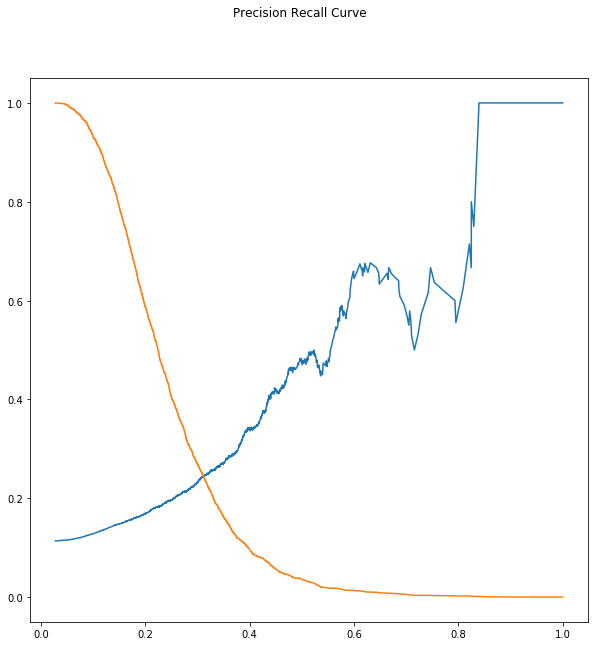

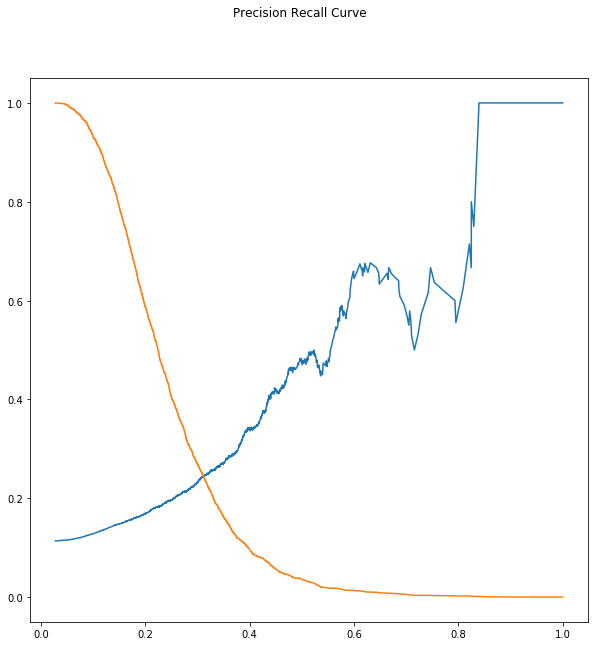

In [68]:
precision_recall_plot(y_test, y_pred_proba)

In [70]:
class_names = ["not early readmit", "early readmit"]

In [71]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=sns.color_palette("Blues")):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    ax = sns.heatmap(cm, cmap = cmap, annot=True, xticklabels=classes, yticklabels=classes)

    ax.set(title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the x labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Vertically center y labels
    plt.setp(ax.get_yticklabels(), va="center")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
    return ax

Confusion matrix, without normalization
[[17662    90]
 [ 2190    81]]


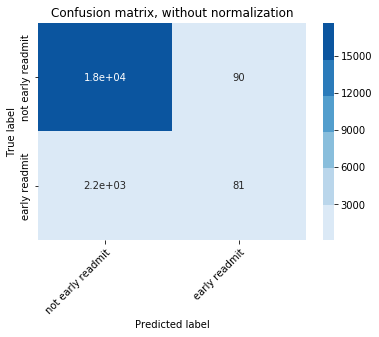

In [75]:
# Plot non-normalized confusion matrix
ax = plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# plt.savefig('confusion_matrix_test.png', bbox_inches="tight")

In [76]:
model.feature_importances_

array([0.00000000e+00, 7.38531472e-03, 6.02615810e-05, 1.13920327e-02,
       1.43444380e-04, 5.46818845e-05, 9.03100422e-02, 0.00000000e+00,
       2.97790111e-05, 1.17065438e-03, 4.73011631e-04, 1.75031376e-03,
       1.95846595e-02, 1.80081108e-02, 4.36688376e-02, 1.26350403e-02,
       5.65913964e-04, 3.85340525e-04, 0.00000000e+00, 1.27184153e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.01446618e-06,
       1.14865924e-04, 2.24361107e-04, 3.06640853e-02, 4.90774403e-04,
       0.00000000e+00, 5.16895355e-04, 1.41802979e-05, 0.00000000e+00,
       1.02621033e-02, 6.34476209e-02, 1.13487808e-04, 1.18801385e-02,
       1.40862746e-04, 7.96625135e-06, 0.00000000e+00, 0.00000000e+00,
       6.86128360e-03, 1.56871792e-03, 8.98106399e-04, 5.73104985e-06,
       9.64148799e-03, 1.13927336e-04, 0.00000000e+00, 0.00000000e+00,
       1.03563566e-05, 2.29517041e-05, 1.12538136e-04, 8.94100560e-04,
       0.00000000e+00, 1.45157838e-04, 0.00000000e+00, 1.05910756e-04,
      

Combining grid search and model selection:

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV


class EstimatorSelectionHelper:

    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, **grid_kwargs):
        for key in self.keys:
            print('Running GridSearchCV for %s.' % key)
            model = self.models[key]
            params = self.params[key]
            grid_search = GridSearchCV(model, params, **grid_kwargs)
            grid_search.fit(X, y)
            self.grid_searches[key] = grid_search
        print('Done.')

    def score_summary(self, sort_by='mean_test_score'):
        frames = []
        for name, grid_search in self.grid_searches.items():
            frame = pd.DataFrame(grid_search.cv_results_)
            frame = frame.filter(regex='^(?!.*param_).*$')
            frame['estimator'] = len(frame)*[name]
            frames.append(frame)
        df = pd.concat(frames)

        df = df.sort_values([sort_by], ascending=False)
        df = df.reset_index()
        df = df.drop(['rank_test_score', 'index'], 1)

        columns = df.columns.tolist()
        columns.remove('estimator')
        columns = ['estimator']+columns
        df = df[columns]
        return df

In [ ]:
models = {
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

params = {
    'ExtraTreesClassifier': {'n_estimators': [16, 32]},
    'RandomForestClassifier': [
        {'n_estimators': [16, 32]},
        {'criterion': ['gini', 'entropy'], 'n_estimators': [8, 16]}],
    'AdaBoostClassifier':  {'n_estimators': [16, 32]},
    'GradientBoostingClassifier': {'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0]}
}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
helper = EstimatorSelectionHelper(models, params)
helper.fit(X, y, scoring='f1', n_jobs=-1)
helper.fit(X, y, scoring='neg_log_loss', n_jobs=-1)
helper.score_summary()